<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/CNN_%26_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow
Computer vision is thr practice of writing algorithms which can discorver patterns in visual data. Such as the camera of a self driving car recognizing the car in front

# Get the data (Food101)

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-03 12:42:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.9MB/s    in 6.1s    

2023-08-03 12:42:35 (17.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

# Inspect the data(becoming one with data)
Very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project , this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak  # Datanın içindeki listelere bakmak için !ls kullanıyoruz.

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath , dirnames , filenames , in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' " )   # 0 images yazanlara bakmıyoruz onlar datanın yapıldıgı bilgisayarda ds.store şeklinde tutulmuş olması yüzünden öyle gözüküyor. biz test olarak 250 train olarak 750 foto oldugunu görebiliyoruz bu şekilde

There are 2 directories and 0 images in 'pizza_steak' 
There are 2 directories and 0 images in 'pizza_steak/test' 
There are 0 directories and 250 images in 'pizza_steak/test/steak' 
There are 0 directories and 250 images in 'pizza_steak/test/pizza' 
There are 2 directories and 0 images in 'pizza_steak/train' 
There are 0 directories and 750 images in 'pizza_steak/train/steak' 
There are 0 directories and 750 images in 'pizza_steak/train/pizza' 


In [ ]:
# Another way to find out how many images are in file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

# To visualize our image , first lets get the class names programmaticaly.

In [ ]:
# Get the classnames programmaticaly
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  #Created a list of class_names from subdirectories
print(class_names)
#Sonuç olarak, bu kod, "pizza_steak/train" dizinindeki alt dizinleri dolaşarak eğitim veri setinde bulunan sınıf adlarını alır ve alfabetik olarak sıralanmış bir sınıf adları listesi olan class_names değişkenine atar.

['pizza' 'steak']


In [ ]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  # Setup the target directory (We will view images from here)
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder) , 1)  #target folderın içinden os.listdir ile 1 tane random img alıyor.
  print(random_image)

  # Read in the image and plot it using mathplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) #Bu ifade, hedef dizin ile rastgele seçilen resmin dosya adını birleştirerek, rastgele seçilen resmin tam yolunu oluşturur.
  #imread fonksiyonu, belirtilen dosya yolundaki resmi diskten belleğe yükler. Bu fonksiyon, resim dosyasını Numpy dizisine dönüştürür ve bu Numpy dizisini geri döndürür.
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f" Image shape : {img.shape}")
  return img  #burda image return etmemizin sebebi yukardaki imread fonksiyonunun numpy array olarak döndürmesi image ları

  #Bu Python kodu, verilen hedef dizindeki belirli bir hedef sınıfa ait rastgele bir görüntüyü görselleştiren bir fonksiyon içerir.




['3601483.jpg']
 Image shape : (512, 512, 3)


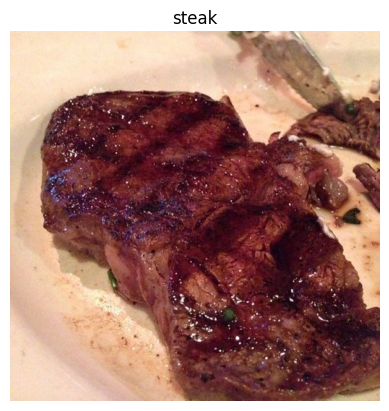

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/" , target_class = "steak")

In [ ]:
img #numpy array
import tensorflow as tf
tf.constant(img)  #burda array içinde gördüğümüz değerler aslında sırasıyla RGB formatına göre oluyor ve bu değerlerin hepsi 0 la 255 arasında. Yani son index 255 olsaydı herhangi bir image da bu demek oluyor ki image çok fazla blue pixel içeriyor.

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[247, 216, 185],
        [252, 221, 190],
        [255, 226, 192],
        ...,
        [253, 227, 190],
        [253, 227, 192],
        [250, 224, 189]],

       [[246, 215, 184],
        [251, 220, 189],
        [254, 224, 190],
        ...,
        [250, 224, 189],
        [250, 224, 189],
        [248, 222, 187]],

       [[249, 218, 187],
        [253, 222, 191],
        [255, 224, 193],
        ...,
        [249, 223, 190],
        [250, 224, 191],
        [249, 223, 190]],

       ...,

       [[246, 216, 192],
        [247, 217, 193],
        [247, 217, 193],
        ...,
        [212, 180, 139],
        [210, 178, 137],
        [214, 182, 141]],

       [[245, 214, 193],
        [245, 214, 193],
        [245, 215, 191],
        ...,
        [214, 181, 140],
        [212, 179, 138],
        [213, 180, 137]],

       [[243, 212, 191],
        [243, 212, 191],
        [242, 212, 188],
        ...,
        [213, 180, 13

In [ ]:
# View our image shape
img.shape  #width , height , colour channels

(512, 512, 3)

# Many machine learning models , including neural networks prefer the values they work with to be between 0 and 1. Knowing this , one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values between 0 and 1 (normalization but with 1 image)
img/255.



array([[[0.96862745, 0.84705882, 0.7254902 ],
        [0.98823529, 0.86666667, 0.74509804],
        [1.        , 0.88627451, 0.75294118],
        ...,
        [0.99215686, 0.89019608, 0.74509804],
        [0.99215686, 0.89019608, 0.75294118],
        [0.98039216, 0.87843137, 0.74117647]],

       [[0.96470588, 0.84313725, 0.72156863],
        [0.98431373, 0.8627451 , 0.74117647],
        [0.99607843, 0.87843137, 0.74509804],
        ...,
        [0.98039216, 0.87843137, 0.74117647],
        [0.98039216, 0.87843137, 0.74117647],
        [0.97254902, 0.87058824, 0.73333333]],

       [[0.97647059, 0.85490196, 0.73333333],
        [0.99215686, 0.87058824, 0.74901961],
        [1.        , 0.87843137, 0.75686275],
        ...,
        [0.97647059, 0.8745098 , 0.74509804],
        [0.98039216, 0.87843137, 0.74901961],
        [0.97647059, 0.8745098 , 0.74509804]],

       ...,

       [[0.96470588, 0.84705882, 0.75294118],
        [0.96862745, 0.85098039, 0.75686275],
        [0.96862745, 0

#An end-to-end example

Lets build a convolutional neural network to find patterns in our images , more spesifically we need way to;

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"  #soldaki dosya işaretinden yolu kopyala diyebiliriz.
test_dir = "pizza_steak/test"  # veya böyle elimizle yazabiliriz.

# Preprocess data (get all of the pixel values between 0 and 1 , also called scaling/normalizatin)
train_datagen = ImageDataGenerator(rescale = 1./255)  #rescale : generate batches of tensor image data with real-time data augmentation ,her pixeli 255 e bölerek feature scaling yapıyor.(compulsary)
valid_datagen = ImageDataGenerator(rescale = 1./255) #Yani image data generator classını scale etmek için kullanıyoruz.

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir ,
                                               batch_size = 32 ,
                                               target_size = (224,224) ,  # Output images size
                                               class_mode = "binary"  , # Modelimize söylüyoruz binary çalışacağımızı 2 farklı classla çalışıyoruz çünkü.
                                               seed = 42
                                               )

valid_data = valid_datagen.flow_from_directory(directory = test_dir ,
                                               batch_size = 32 ,
                                               target_size = (224,224) ,
                                               class_mode = "binary" ,
                                               seed = 42
                                               )

# Build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 10 ,
                            kernel_size = 3,
                            activation = "relu" ,
                            input_shape = (224,224,3)) ,   #Yukarda valid ve train datalarda ne girdiysek shape imiz o olacak.

     tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,

     tf.keras.layers.MaxPool2D( pool_size = 2 ,
                               padding = "valid")   ,

     tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
     tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D( 2 ) ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense( 1 , activation = "sigmoid") #output layer
    ]

)

#Compile a model
model_1.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

#Fit the model
history_1 = model_1.fit(train_data , epochs = 5 , steps_per_epoch= len(train_data) , validation_data = valid_data , validation_steps = len(valid_data))  #flow_from_directory sayesinde label değerlerini yazmamıza gerek kalmıyor çünkü it creates the data and labels automatically for us
#steps for epoch ta train datamızın uzunluğunu almamızın sebebi we needed to do 47 steps per epoch

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 141ms/step - loss: 0.6935 - accuracy: 0.5160 - val_loss: 0.6510 - val_accuracy: 0.5300
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6349 - accuracy: 0.6033 - val_loss: 0.5803 - val_accuracy: 0.6860
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.5340 - accuracy: 0.7267 - val_loss: 0.4083 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4513 - accuracy: 0.7973 - val_loss: 0.4119 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4218 - accuracy: 0.8187 - val_loss: 0.3742 - val_accuracy: 0.8380


In [ ]:
len(train_data) #bu 47 aslında her batch içinde kaç tane image oldugunu gösteriyor.
#Batchlere bölmemizin sebebi de direkt 1500 image atsak koda bilgisayarımız bunu çalıştırmakta çok zorlanır ve modelimiz düzgün çalışmayabilir bu yüzden batchlere ayırıp belli sayıda image ları atıyoruz.

47

In [ ]:
1500 / 32  #1500 image i 32 batch e böldük ve her batch içinde kaç image oldugunu bu şekilde anlıyoruz.

46.875

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Using the same model as before

Lets replicate the model we have built in a previous section to see if it works with our image data

The model we are building is from the tensorflow.playground.org

In [ ]:
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model

model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (224,224,3)) ,
     tf.keras.layers.Dense(10 , activation = "relu") ,
     tf.keras.layers.Dense(10 , activation = "relu") ,
     tf.keras.layers.Dense(4 , activation = "relu") ,
     tf.keras.layers.Dense(1 , activation = "sigmoid" )
    ]
)

# Compile a model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
                optimizer = tf.keras.optimizers.Adam( learning_rate  = 0.1) ,
                metrics = ["accuracy"]

                )
#Fit model

history_2 = model_2.fit(train_data ,  epochs = 5 , steps_per_epoch = len(train_data) , validation_data = valid_data , validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 107ms/step - loss: 42.4927 - accuracy: 0.5047 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6942 - accuracy: 0.5093 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6936 - accuracy: 0.5027 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6945 - accuracy: 0.5013 - val_loss: 0.6956 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 10)                1505290   
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 4)                 44        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,505,449
Trainable params: 1,505,449
Non-trainable params: 0
_________________________________________________________________


# 🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

# We will try to improve our model

In [ ]:
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model

model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (224,224,3)) ,
     tf.keras.layers.Dense(200, activation = "relu") ,
     tf.keras.layers.Dense(200, activation = "relu") ,
     tf.keras.layers.Dense(200 , activation = "relu") ,
     tf.keras.layers.Dense(200 , activation = "relu") ,
     tf.keras.layers.Dense(1 , activation = "sigmoid")
    ]
)

# Compile a model

model_3.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]

                )
#Fit model

history_3 = model_3.fit(train_data ,  epochs = 5 , steps_per_epoch = len(train_data) , validation_data = valid_data , validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 127ms/step - loss: 4.3343 - accuracy: 0.5993 - val_loss: 0.5708 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.7009 - accuracy: 0.7007 - val_loss: 0.4739 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.5645 - accuracy: 0.7400 - val_loss: 0.6948 - val_accuracy: 0.5800
Epoch 4/5
47/47 [==============================] - 5s 103ms/step - loss: 0.4996 - accuracy: 0.7680 - val_loss: 0.4312 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.5251 - accuracy: 0.7660 - val_loss: 0.5844 - val_accuracy: 0.7100


# Burda öğrendiğimiz şey CNN in computer vision için ne kadar güçlü bir algorith oldugu. Çünkü biz normal NN algorithmasıyla ne kadar uğraşsak da CNN de elde ettigimiz accuracy yi elde edemedik 500x fazla learnable parametremiz olmasına rağmen.

# Binary classification : Lets break it down

1.  Become one with the data(visualize)
2. Preprocess the data (Prepared it for our model , the main step here was scaling(normalizing and turning our data into batches)
3. Created a model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment)



# Becoming one with the data

['1290362.jpg']
 Image shape : (512, 512, 3)
['111051.jpg']
 Image shape : (512, 382, 3)


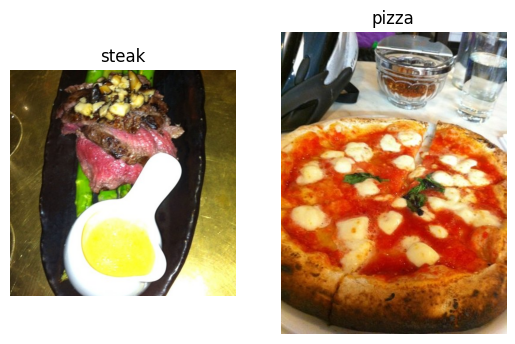

In [ ]:
#Visualize our data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/" , "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/" , "pizza")

# Preprocess the data (prepare it for a model)

In [ ]:
# Define the directory dataset paths
tf.random.set_seed(42)
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Create a train and test data generators and rescale the data
train_datagen = ImageDataGenerator(rescale = 1./255)  # Automatically turn our images into tensor image data with scaling.
test_datagen = ImageDataGenerator(rescale = 1./255)

#We should load in our image data from directories and turn them into batches. (yani image larla çalışırken her zaman directoryden upload ediyoruz image ları)

train_data1 = train_datagen.flow_from_directory(directory = train_dir ,
                                                batch_size = 32 ,
                                                target_size = (224,224) ,
                                                class_mode = "binary" ,
                                                seed = 42
                                                )
test_data1 = test_datagen.flow_from_directory(directory = test_dir ,
                                              batch_size = 32 , #burda her batch içinde kaç image olacagını belirliyoruz.
                                              target_size = (224,224) ,
                                              class_mode = "binary" ,
                                              seed = 42
                                              )
#Buranın sonunda aslında imagelarımızı preprocess etme işlemini bitirmiş oluyoruz.

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images , labels = train_data.next() # Get the "next" batch of images/labels in train_data. Burda biz ilk batche bakıyoruz .next ile
len(images) , len(labels)  # Yani bizim modelimiz aslında her batchin içindeki 32 image için otomatik olarak class belirliyor.

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[ : 2] , images[0].shape

(array([[[[0.28235295, 0.2392157 , 0.30588236],
          [0.27058825, 0.227451  , 0.29411766],
          [0.27058825, 0.227451  , 0.29411766],
          ...,
          [0.08235294, 0.07058824, 0.1137255 ],
          [0.08235294, 0.05882353, 0.09803922],
          [0.0627451 , 0.03921569, 0.07843138]],
 
         [[0.30588236, 0.2627451 , 0.32941177],
          [0.28627452, 0.24313727, 0.30980393],
          [0.28235295, 0.2392157 , 0.3019608 ],
          ...,
          [0.07058824, 0.0627451 , 0.10588236],
          [0.08235294, 0.07058824, 0.10588236],
          [0.05490196, 0.04313726, 0.07843138]],
 
         [[0.3254902 , 0.28235295, 0.34509805],
          [0.30588236, 0.2627451 , 0.3254902 ],
          [0.3019608 , 0.25882354, 0.32156864],
          ...,
          [0.07058824, 0.07058824, 0.10196079],
          [0.07450981, 0.07058824, 0.10196079],
          [0.05882353, 0.05490196, 0.08627451]],
 
         ...,
 
         [[0.98823535, 1.        , 0.9725491 ],
          [0.98823

In [ ]:
# View the first batch of labels
labels

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
      dtype=float32)

#Create a model with baseline

In [ ]:
#Create a model
tf.random.set_seed(42)

model_6 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 10 ,  # Filters is the size of sliding windows going across an input (higher = more complex model)
                            kernel_size = 3 , # The size of the sliding window going across an input
                            strides = 1 , # The size of the step the sliding window takes across an input
                            padding = "valid" , #Eğer elimizdeki fotoğrafların edge inde önemli bilgiler varsa padding kullanmamız gerekiyor. if "same" output shape is the same as input shape. if "valid" output shape gets compressed
                            activation = "relu" ,
                            input_shape = (224,224,3) #We should tell our model to our input shape in the first layer.
                            )  ,  #Parameterlarla alakalı pdf dosyasına bak
     tf.keras.layers.Conv2D(10 , 3 , activation = "relu" )   ,
     tf.keras.layers.Conv2D(10 , 3 , activation = "relu" ) ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(1 , activation = "sigmoid")

    ]

)
# Compile a model
model_6.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

#Fit the model
history_6 = model_6.fit(train_data1 , epochs = 5 , steps_per_epoch = len(train_data1) , validation_data = test_data1 , validation_steps = len(test_data1))
# Train_data1 is combination of labels and sample data



Epoch 1/5
47/47 [==============================] - 8s 124ms/step - loss: 0.7235 - accuracy: 0.6447 - val_loss: 0.4736 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4051 - accuracy: 0.8307 - val_loss: 0.3961 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3247 - accuracy: 0.8633 - val_loss: 0.4003 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.2225 - accuracy: 0.9213 - val_loss: 0.3775 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.0909 - accuracy: 0.9800 - val_loss: 0.3219 - val_accuracy: 0.8700


# Evaluating model

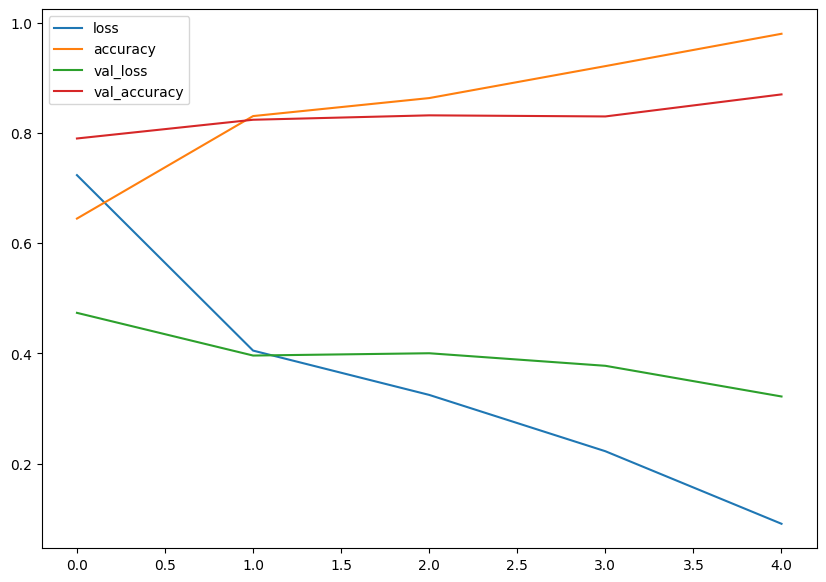

In [ ]:
import pandas as pd
pd.DataFrame(history_6.history).plot(figsize = (10 , 7));


In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

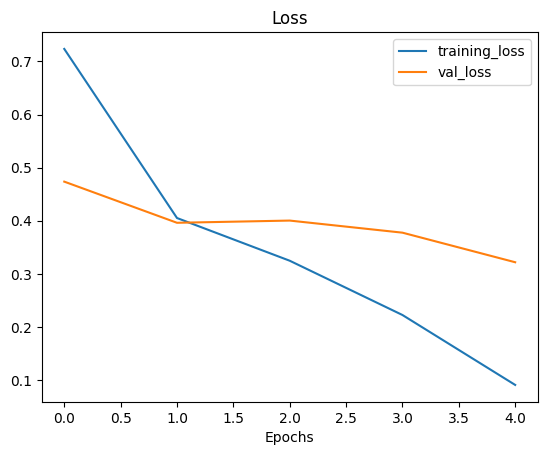

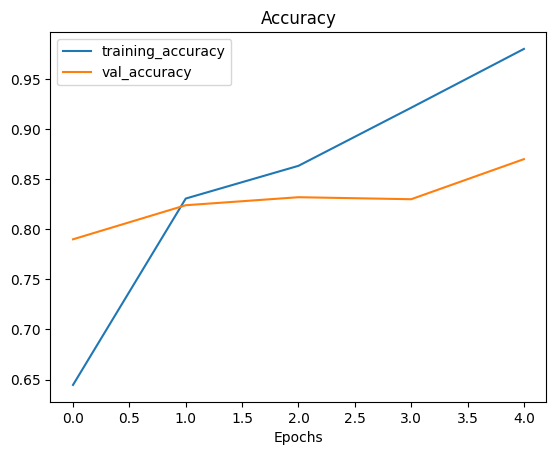

In [ ]:
plot_loss_curves(history_6)

# When a model's validation loss starts to increase , it is likely that the model is overfitting the training set. This means , it is learning the patterns in the training dataset very well and thus the model's ability to generalize to unseen data will be diminished.

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

# Adjust the model parameters:

Fitting the machine learning model comes in 3 steps :

0. Create a baseline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

Ways to induce overfitting: (overfitting olabilir bunları yaparsak)

* Increase the number of conv layers.
* Increase the number of conv filters.
* Add another dense layer to the output of our flattened layer.

Reduce overfitting:

* Add data augmentation.
* Add regularization layer (Such as MaxPool2D).
* Add more data...




In [ ]:
# Create a new model
tf.random.set_seed(42)

model_7 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 10 ,
                            kernel_size = 3 ,
                            padding = "valid" ,
                            activation = "relu" ,
                            input_shape = (224,224,3)
                            )   ,
     tf.keras.layers.MaxPool2D(pool_size = 2 ,  #Pooling te aslında image ımızın size ını düşürüyoruz. 2 girdiğimizde 2x2 lik bir alan alıyoruz normal image da. bu 2x2 lik alanda değeri en yüksek olanı alıyoruz. Yani aslında en önemli pixeli alıyoruz bu şekilde image hakkında bilgi kaybı da çok az yaşamış oluyoruz ve size ımız küçüldüğü için pattern bulmak kolay oluyor.
                               padding = "valid"
                               ) ,
     tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense( 1 , activation = "sigmoid")


    ]

)

#Compile the model
model_7.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

#Fit the model

history_7 = model_7.fit( train_data1 , epochs = 5 , steps_per_epoch = len(train_data1) , validation_data = test_data1 , validation_steps = len(test_data1))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 0.5828 - accuracy: 0.7033 - val_loss: 0.4304 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4397 - accuracy: 0.7920 - val_loss: 0.4076 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4181 - accuracy: 0.8147 - val_loss: 0.3394 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 5s 117ms/step - loss: 0.3842 - accuracy: 0.8347 - val_loss: 0.3272 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.3883 - accuracy: 0.8307 - val_loss: 0.3861 - val_accuracy: 0.8400


In [ ]:
model_7.summary()  #224 seçiyoruz fakat summary de 222 çıkıyor bunun sebebi padding vermemiz. Poolingte yarıya düşüyor zaten poolingin amacı bu.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

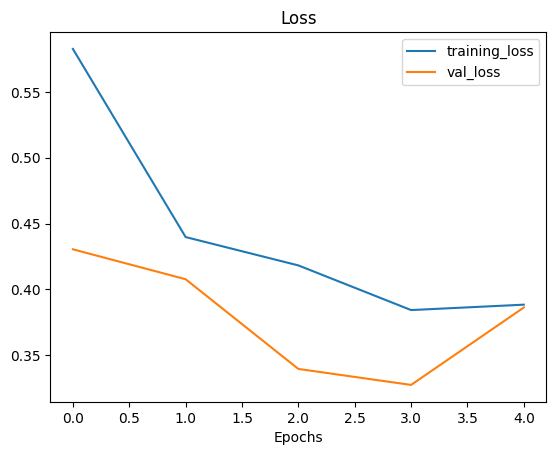

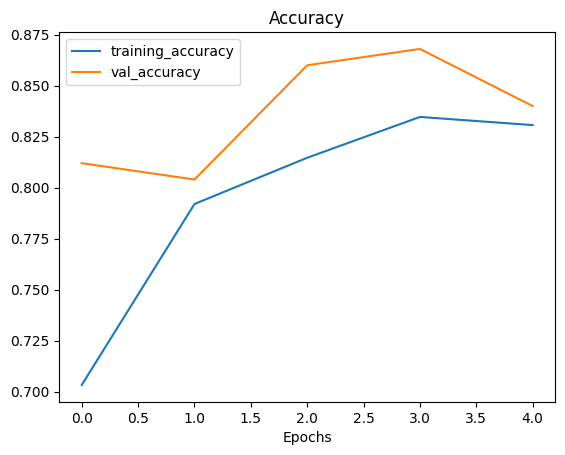

In [ ]:
plot_loss_curves(history_7)

# Opening our bag tricks and finding data augmentation

In [ ]:
#image augmentation kısmını aslında biz ImageDataGenerator ile yapıyoruz. Yani scaling de aslında bir augmentation
train_datagen_augmentation = ImageDataGenerator(rescale = 1./255 ,
                                                rotation_range = 0.2 , #How much do you want to rotate an image?
                                                shear_range = 0.2 , #How much do you want to shear(kırpmak) an image?
                                                zoom_range = 0.2 , #Zoom in randomly on an image
                                                width_shift_range = 0.2 , # move your image around the x axis
                                                height_shift_range = 0.2 ,  # move your image around the y axis
                                                horizontal_flip = True #Do you want to flip an image?
                                                )  #Artık bu bizim augmented imagelarımızı içerecek.

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)

##Create ImageDataGenerator without data augmentation on the test set
test_datagen = ImageDataGenerator(rescale = 1./255)


# What is data augmentation?

Data augmentation is the process of altering our training data , leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns . Altering might mean adjusting the rotation of an image , flipping it , cropping it or something similar.

In [ ]:


train_data_aug = train_datagen_augmentation.flow_from_directory(directory = train_dir ,
                                                                      target_size = (224,224) ,
                                                                      batch_size = 32 ,
                                                                      class_mode = "binary" ,
                                                                      shuffle = False # For demonstration purpose only.
                                                                      )

train_data_no = train_datagen.flow_from_directory(directory = train_dir ,
                                                  batch_size = 32 ,
                                                  target_size = (224,224) ,
                                                  class_mode = "binary" ,
                                                  shuffle = False
                                                  )
test_data_no = test_datagen.flow_from_directory(directory = test_dir ,
                                          target_size = (224 , 224) ,
                                          batch_size = 32 ,
                                          class_mode = "binary"
                                          )

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


 # Data augmentation is usually only performed on the training data. Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

 Yani bizim directorydeki original imagelarımız aslında değişmiyor augmented ettiğimizde sadece kod içinde değişiyor.

# Visualize data augmentation

In [ ]:
# Get sample data batches
images , labels = train_data_no.next()
augmented_images , augmented_labels = train_data_aug.next()
len(images) , len(labels) , len(augmented_images) , len(augmented_labels)  #labels arent augmented. Only data (images)




(32, 32, 32, 32)

showing image number : 2


(-0.5, 223.5, 223.5, -0.5)

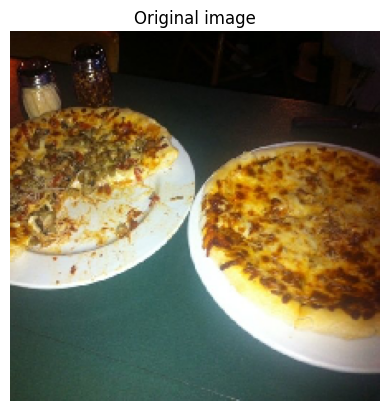

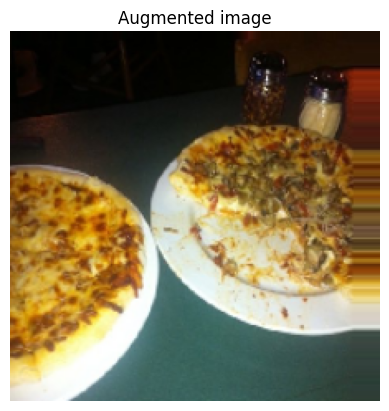

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint( 0 , 32 ) #batchlerimizde 32 image oldugu icin 32 yazıyoruz.
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)


In [ ]:
#Create a model with augmented images
tf.random.set_seed(42)

model_8 = tf.keras.Sequential(
     [
      tf.keras.layers.Conv2D(filters = 10 ,
                             kernel_size = 3 ,
                             padding = "valid" ,
                             activation = "relu" ,
                             input_shape = (224,224 ,3)
                             )   ,
      tf.keras.layers.MaxPool2D(pool_size = 2 ,
                                padding = "valid"
                                ) ,
      tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
      tf.keras.layers.MaxPool2D() ,
      tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
      tf.keras.layers.MaxPool2D() ,
      tf.keras.layers.Flatten() ,
      tf.keras.layers.Dense(1 , activation = "sigmoid")

     ]

)
#Compile a model
model_8.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

#Fit the model
history_8 = model_8.fit(train_data_aug , epochs = 5 , steps_per_epoch = len(train_data_aug) , validation_data = test_data_no , validation_steps = len(test_data_no) )

Epoch 1/5
47/47 [==============================] - 22s 434ms/step - loss: 0.7186 - accuracy: 0.4167 - val_loss: 0.6888 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 19s 401ms/step - loss: 0.7099 - accuracy: 0.5493 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 20s 427ms/step - loss: 0.6896 - accuracy: 0.5447 - val_loss: 0.6618 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 19s 403ms/step - loss: 0.6621 - accuracy: 0.6307 - val_loss: 0.5627 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 19s 409ms/step - loss: 0.6116 - accuracy: 0.7120 - val_loss: 0.5440 - val_accuracy: 0.7080


#Augment edilmemis imagelarda process in yarı yarıya daha hızlı olmasının sebebi daha önce dediğim gibi augmentation bizim directory imagelarımızı degistirmiyor kodun icinde augment ediliyor.


Kodun içinde edilme kısmı aslında tam olarak burada oluyor. Image Augmentation işlemi epochların içinde gerçekleşiyor. Bu yüzden de daha uzun sürüyor işlem.

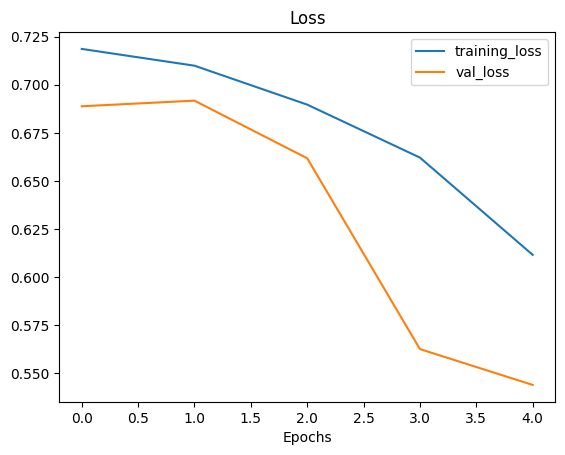

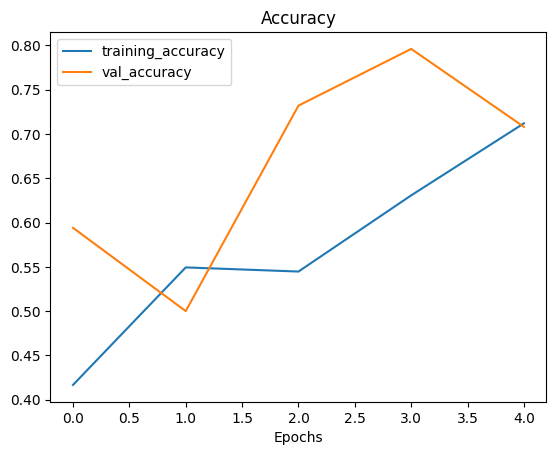

In [ ]:
# Lets visualize our loss curve
plot_loss_curves(history_8)

In [ ]:
#Train data with augmented but shuffled

train_datagen_aug_1 = ImageDataGenerator(rescale = 1./255 ,
                                         rotation_range = 0.2 ,
                                         width_shift_range = 0.2 ,
                                         height_shift_range = 0.2 ,
                                         shear_range = 0.2 ,
                                         zoom_range = 0.2 ,
                                         horizontal_flip = True
                                         )

train_data_shuffle = train_datagen_aug_1.flow_from_directory(directory = train_dir ,
                                                             target_size = (224,224) ,
                                                             batch_size = 32 ,
                                                             class_mode = "binary"  #Shuffle has default value true
                                                             )



Found 1500 images belonging to 2 classes.


In [ ]:
#Create a model with shuffled data
model_9 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D( filters = 10 ,
                             kernel_size = 3 ,
                             padding = "valid" ,
                             input_shape = (224,224,3) ,
                             activation = "relu" ,
                             )   ,
     tf.keras.layers.MaxPool2D(pool_size = 2 ,
                               padding = "valid"
                               ) ,
     tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(1 , activation =  "sigmoid")
    ]
)
#Compile a model
model_9.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )
#Fit a model
history_9 = model_9.fit(train_data_shuffle , epochs = 5 , steps_per_epoch = len(train_data_shuffle) , validation_data =test_data_no , validation_steps = len(test_data_no))

Epoch 1/5
47/47 [==============================] - 22s 422ms/step - loss: 0.6831 - accuracy: 0.5867 - val_loss: 0.5821 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 19s 403ms/step - loss: 0.5325 - accuracy: 0.7347 - val_loss: 0.4672 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 20s 420ms/step - loss: 0.5185 - accuracy: 0.7467 - val_loss: 0.3916 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 20s 423ms/step - loss: 0.4805 - accuracy: 0.7820 - val_loss: 0.3685 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 19s 407ms/step - loss: 0.4575 - accuracy: 0.7887 - val_loss: 0.3809 - val_accuracy: 0.8440


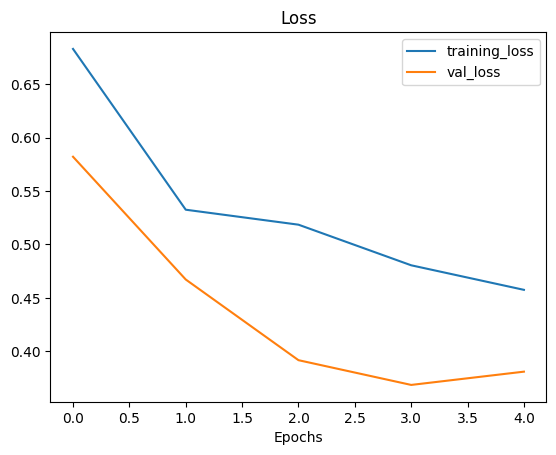

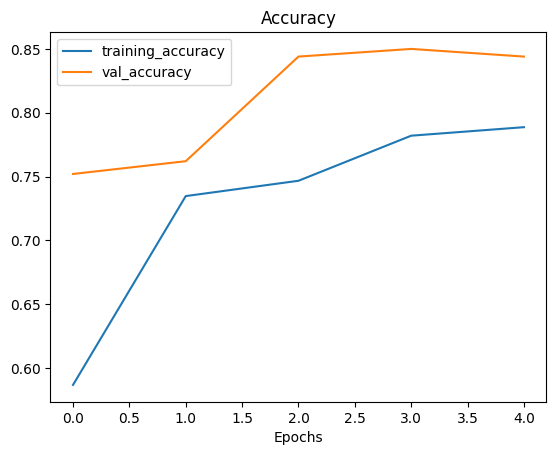

In [ ]:
# Viewing the loss curves
plot_loss_curves(history_9)

# Shuffle false oldugunda modelimiz ilk başta pizza imageları öğreniyor sonrasında steak lere geçiyor yani sırayla yapıyor yani pizzayı öğrendikten steak e geçince steak i öğrenmekte zorlanıyor.

#Shuffle true oldugunda ise image ları random alıyor yani belki 2 pizza alıp sonrasında steak alıyor gibi gibi bu yüzden de learning kısmı daha iyi gerçekleşiyor.

# Repeat until satisfied

Since we are already beaten our baseline , there are a few things we could try to continue to improve our model:
* Increase the number of model layers (more conv layer or maxpool layer).
* Increase the number of filters in each convolutional layer.
* Train for longer (more epochs).
* Find ideal learning rate (But default value seems perfect for our model).
* Get more data (Give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learn and adjust it for our own use case.


In [ ]:
#Create a model with shuffled data
model_10 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D( filters = 32 ,
                             kernel_size = 3 ,
                             padding = "valid" ,
                             input_shape = (224,224,3) ,
                             activation = "relu" ,
                             )   ,
     tf.keras.layers.MaxPool2D(pool_size = 2 ,
                               padding = "valid"
                               ) ,
     tf.keras.layers.Conv2D( 32 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D( 32 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D( 32 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D( 32 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D( 32 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,


     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(1 , activation =  "sigmoid")
    ]
)
#Compile a model
model_10.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )
#Fit a model
history_10 = model_10.fit(train_data_shuffle , epochs = 10 , steps_per_epoch = len(train_data_shuffle) , validation_data =test_data_no , validation_steps = len(test_data_no))

Epoch 1/10
47/47 [==============================] - 23s 423ms/step - loss: 0.6511 - accuracy: 0.6113 - val_loss: 0.5770 - val_accuracy: 0.7340
Epoch 2/10
47/47 [==============================] - 20s 433ms/step - loss: 0.5786 - accuracy: 0.7027 - val_loss: 0.4362 - val_accuracy: 0.8300
Epoch 3/10
47/47 [==============================] - 20s 429ms/step - loss: 0.5166 - accuracy: 0.7513 - val_loss: 0.3845 - val_accuracy: 0.8640
Epoch 4/10
47/47 [==============================] - 19s 412ms/step - loss: 0.4815 - accuracy: 0.7653 - val_loss: 0.3823 - val_accuracy: 0.8620
Epoch 5/10
47/47 [==============================] - 21s 437ms/step - loss: 0.4947 - accuracy: 0.7760 - val_loss: 0.3578 - val_accuracy: 0.8500
Epoch 6/10
47/47 [==============================] - 19s 413ms/step - loss: 0.4780 - accuracy: 0.7913 - val_loss: 0.3607 - val_accuracy: 0.8600
Epoch 7/10
47/47 [==============================] - 21s 442ms/step - loss: 0.4481 - accuracy: 0.8047 - val_loss: 0.3694 - val_accuracy: 0.8580

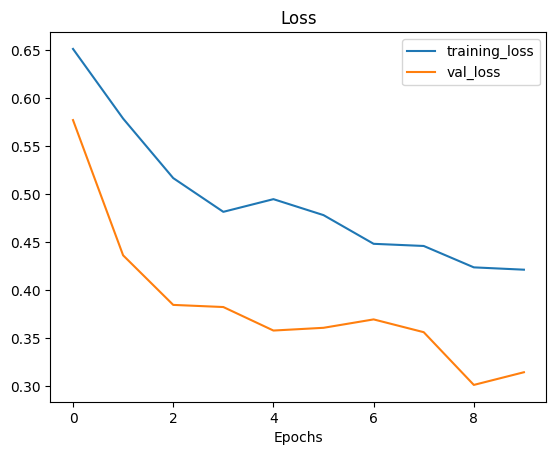

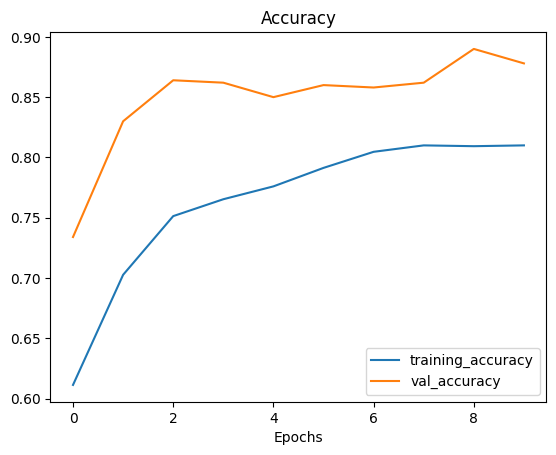

In [ ]:
plot_loss_curves(history_10)

# Making a predictions with our model on our custom data

In [74]:
# Classes we are working with
print( class_names)

['pizza' 'steak']


In [77]:
#View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-08-03 15:03:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-08-03 15:03:08 (185 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

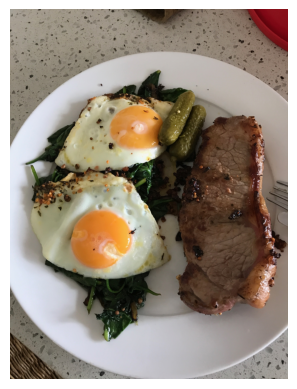

In [80]:
steak = mpimg.imread("03-steak.jpeg.2")
plt.imshow(steak)
plt.axis(False)

In [109]:
steak.shape ,  augmented_images.shape #Bizim modelimiz (224 , 224 , 3) shapeinin içinde aynı zamanda batch size da içeriyor 32 olarak.
#Bu yüzden predict edeceğimiz new image da da bu 32 batch size ın shape in içinde olmasını bekliyor ve aynı zamanda 224,224 height width değerleri de aynı olması lazım.


((4032, 3024, 3), (32, 224, 224, 3))

# When you train a neural network and you want to make a prediction with it on your custom data , it is important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [131]:
# Create a function to import and image and resize it to be able to be used with our neural network.
def load_and_prep_img(filename , img_shape = 224):
  """
  Reads an image from filename , turns it into a tensor and reshapes it to (img_shape , img_shape , color_channels).
  """
  #Read in the image
  img = tf.io.read_file(filename)  #filename parametresi ile belirtilen görüntü dosyasını tf.io.read_file işleviyle okur ve bir baytlar dizisi olarak depolar.

  #Decode the read file into a tensor
  img = tf.image.decode_image(img)  #tf.image.decode_image işlevini kullanarak, baytlar dizisini TensorFlow tensörüne dönüştürür. Bu, görüntü dosyasının içeriğini anlamlandırma ve uygun formata getirme işlemini gerçekleştirir.

  #Resize the image
  img = tf.image.resize( img , size = [img_shape , img_shape])

  #Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [120]:
steak = load_and_prep_img("03-steak.jpeg.2")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [123]:
pred = model_10.predict(tf.expand_dims(steak , axis = 0))
pred

1/1 [==============================] - 0s 30ms/step


array([[0.76194096]], dtype=float32)

# Looks like our image is being put through our model , however , it currently outputs a prediction probability , wouldnt it be nice if we could visualize the image as well as the model prediction?

In [124]:
#Remind our class names
print(class_names)

['pizza' 'steak']


In [125]:
#We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [134]:
def pred_and_plot(model , filename , class_names = class_names):
  """
  Imports an image located at filename , makes a prediction with model and plots the image with the predicted class as the title
  """

  #Import the target image and preprocess in
  img = load_and_prep_img(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img , axis = 0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class names
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 23ms/step


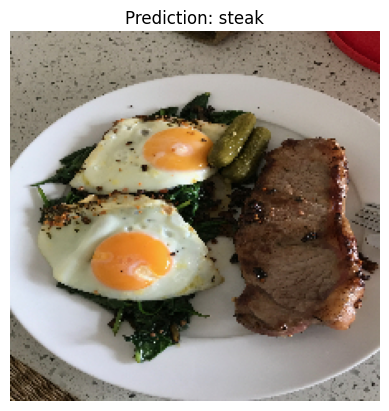

In [135]:
#Test our model on a custom image
pred_and_plot(model = model_10 , filename = "03-steak.jpeg.2")

In [137]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-08-03 16:46:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-08-03 16:46:16 (272 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



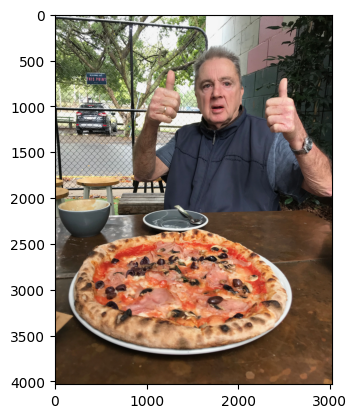

In [139]:
pizza_dad = mpimg.imread("03-pizza-dad.jpeg")
plt.imshow(pizza_dad)


1/1 [==============================] - 0s 36ms/step


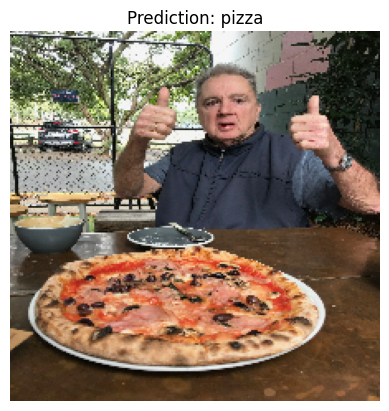

In [140]:
pred_and_plot(model = model_10 , filename = "03-pizza-dad.jpeg")